In [ ]:
def add_all(*inputs):
    s=0
    for i in range(len(inputs)):
        s+=inputs[i]
    return s

In [ ]:
def add_all2(*inputs):
    return sum(inputs)

- list 받는법

In [ ]:
def add_all_3(*arg):
    s=0
    for i in arg:
        for j in i:
            s +=j
    return s

In [ ]:
add_all([1,2,3,4,5])

In [ ]:
add_all_3([1,2,3,4,5])

In [ ]:
add_all_3(1,2,3,4,5)

In [ ]:
def add_all_4(*args):
    temp = 0
    for i in range(len(args)):
        if type(args[i])==list:
            for j in args[i]:
                temp+=j
        else:
            temp+=args[i]
    return temp

In [ ]:
add_all_4([1,2,3,4,5])

15

In [ ]:
add_all_4(1,2,3,4,5)

15

#문서 단어 행렬(Document-Term Matrix, DTM)

1. 표기법

- 문서 단어 행렬(Document-Term Matrix, DTM)이란 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것을 말합니다. 쉽게 생각하면 각 문서에 대한 BoW를 하나의 행렬로 만든 것으로 생각할 수 있으며, BoW와 다른 표현 방법이 아니라 BoW 표현을 다수의 문서에 대해서 행렬로 표현하고 부르는 용어입니다.


예를 들어서 이렇게 4개의 문서가 있다고 합시다.

문서1 : 먹고 싶은 사과

문서2 : 먹고 싶은 바나나

문서3 : 길고 노란 바나나 바나나

문서4 : 저는 과일이 좋아요

이를 문서 단어 행렬로 표현하면 다음과 같습니다.

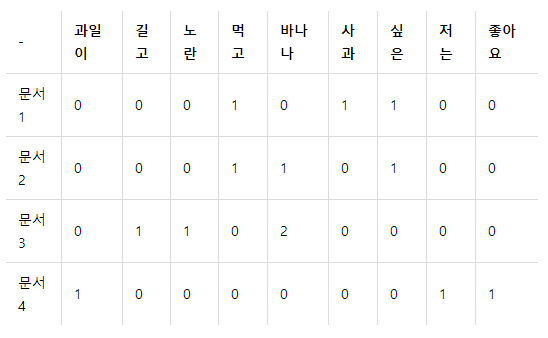

각 문서에서 등장한 단어의 빈도를 행렬의 값으로 표기합니다. 문서 단어 행렬은 문서들을 서로 비교할 수 있도록 수치화할 수 있다는 점에서 의의를 갖습니다.

## DTM의 한계

1. 희소 표현(Sparse representation)
 - 원-핫 벡터는 단어 집합의 크기가 벡터의 차원이 되고 **대부분의 값이 0**이 된다는 특징이 있었습니다. 이 특징은 **공간적 낭비와 계산 리소스를 증가**시킬 수 있다는 점에서 원-핫 벡터의 단점이었습니다. DTM도 마찬가지입니다

 - 각 문서 벡터의 차원은 원-핫 벡터와 마찬가지로 전체 단어 집합의 크기를 가집니다. 만약 가지고 있는 전체 코퍼스가 방대한 데이터라면 문서 벡터의 차원은 수백만의 차원을 가질 수도 있습니다. 또한 많은 문서 벡터가 대부분의 값이 0을 가질 수도 있습니다. 당장 위에서 예로 들었던 문서 단어 행렬의 모든 행이 0이 아닌 값보다 0의 값이 더 많은 것을 볼 수 있습니다.

 - 원-핫 벡터나 DTM과 같은 대부분의 값이 0인 표현을 희소 벡터(sparse vector) 또는 희소 행렬(sparse matrix)라고 부르는데, **희소 벡터는 많은 양의 저장 공간과 계산을 위한 리소스를 필요로 합니다.** 이러한 이유로 전처리를 통해 단어 집합의 크기를 줄이는 일은 BoW 표현을 사용하는 모델에서 중요할 수 있습니다. 텍스트 전처리 방법을 사용하여 구두점, 빈도수가 낮은 단어, 불용어를 제거하고, 어간이나 표제어 추출을 통해 단어를 정규화하여 단어 집합의 크기를 줄일 수 있습니다.

2. 단순 빈도 수 기반 접근

 - 영어에 대해 DTM을 만들었을 때, 불용어인 'the'는 어떤 문서이든 자주 등장할 수 밖에 없다. 그래서 유사한 문서인지 비교할 때, 단순 the가 빈도수가 높다고 유사한 문서라고 판단해선 안 된다. 불용어와 중요 단어에 대해 가중치를 줄 수 있는 방법은 없을까? 그래서 등장한 것이 TF-IDF이다.

 - 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수, 즉 count를 부여하는 경우를 카운트 벡터화.

 - 카운트 벡터화에서는 카운트 값이 높을수록 중요한 단어로 인식하여 문제가 됨.





## 사이킷런 CounterVectorizer 초기화 파타미터

- max_df : 전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어 치러를 제외하기 위한 파라미터, 너무 높은 빈도수를 가지는 단어는 스톱 워드와 비슷한 문법적인 특성으로 반복적인 단어일 가능성이 높기에 이를 제거하기 위해 사용됨. max_df = 100과 같이 정수 값을 가지면 전체 문서에 걸쳐 100개 이하로 나타나는 단어만 피처로 추출. mdf_df = 0.95와 같이 부동소수점(0.0 ~ 1.0)을 가지면 전체 문서에 걸쳐 빈도수 0~95%까지의 단어만 피처로 추출하고 나머지 상위 5%는 피처로 추출하지 않음.

- min_df : 전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어 치러를 제외하기 위한 파라미터. 수백 ~ 수천 개의 전체 문서에서 특정 단어가 min_df에 설정된 값보다 적은 빈도수를 가진다면 이 단어는 크게 중요하지 않거나 필요없는(garbage)성 단어일 확률이 높습니다. min_df = 2와 같이 정수 값을 가지면 전체 문서에 걸쳐서 2번 이하로 나타나는 단어는 리처로 추출하지 않습니다. min_df = 0.002와 같이 부동소수점 값(0.0 ~ 1.0)을 가지면 전체 문서에 걸쳐서 하위 2%이하의 빈도수를 가지는 단어는 피처로 추출하지 않음.
- max_features:  피처로 추출하는 피처의 개수를 제한하며 정수로 값을 지정. 가령 max_features = 2000으로 지정할 경우 가장 높은 빈도를 가지는 단어 순으로 정렬해 2000개까지만 피처로 추출

- stop_words = 'english'로 지정하면 영어의 스톱워드로 지정된 단어는 추출에서 제외.

- ngram_range : bag of words 모델의 단어 순서를 어느 정도 보강하기 위한 n-gram 범위를 설정. 튜플 형태로(범위 최솟값, 범위 최댓값)을 지정. 예를 들어 (1,1)로 지정하면 토큰화된 단어를 1개씩 피처로 추출. (1,2)로 지정하면 토큰화된 단어를 1개씩(minumum 1), 그리고 순서대로 2개씩 (maximum 2) 묶어서 피처로 추출.

- analyzer : 피처 추출을 수행한 단위로 지정. 디폴트는 'word'. word가 아니라 character의 특정 범위를 피처로 만드는 특정한 경우 등을 적용할 때 사용 됨.

- token_patten : 토큰화를 수행하는 정규 표현식 패턴을 지정. 디폴트 값은 '\b\w\w+\b'로, 공백 또는 개행 문자 등으로 구분된 단어 분리자(\b) 사이의 2문자(문자 또는 숫자, 즉 영숫자) 이상의 단어(word)를 토큰으로 분리. analyzer = 'word'로 설정했을 때만 변경 가능하나 디폴트 값을 변경할 경우는 거의 발생 하지 않음. 어근 추출시 외부 함수를 사용할 경우 해당 외부 함수를 token_pattern의 인자로 사용.

- lower_case : 모든 문자를 소문자로 변경할 것인지를 설정.기본 True

### CountVectorizer

1. 문서를 토큰 리스트로 변환
2. 각 문서에서 토큰의 출현 빈도를 셈
3. 각 문서를 BOW 인코딩 벡터로 변환한다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text_data=['나는 내일 공부 해야지','내일 날씨는 좋을까','내일 어디를 가지','공부 집에서 해야지']

count_vectorizer=CountVectorizer()

count_vectorizer.fit(text_data)
print(count_vectorizer.vocabulary_)

{'나는': 2, '내일': 4, '공부': 1, '해야지': 8, '날씨는': 3, '좋을까': 6, '어디를': 5, '가지': 0, '집에서': 7}


In [ ]:
sentence=[text_data[0]] # 나는 내일 공부 해야지
print(count_vectorizer.transform(sentence).toarray())

[[0 1 1 0 1 0 0 0 1]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

In [ ]:
vect.transform(['This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]])

In [ ]:
vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]])

#### stopwords

- Stopwords는 문서에서 단어장을 생성할 떄 무시할 수 있는 단어를 말함.
- 보통 영어의 관사나 접속사, 한국어의 조사 등이 여기에 해당됨. stop_words 인수로 조절할 수 있다.

In [ ]:
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

In [ ]:
vect = CountVectorizer(stop_words="english").fit(corpus)
vect.vocabulary_

{'document': 0, 'second': 1}

#### Token

- analzer, tokenizer, token_pattern 등의 인수로 사용할 토큰 생성기를 선택할 수 있음.

In [ ]:
vect = CountVectorizer(analyzer="char").fit(corpus)
vect.vocabulary_

{'t': 16,
 'h': 8,
 'i': 9,
 's': 15,
 ' ': 0,
 'e': 6,
 'f': 7,
 'r': 14,
 'd': 5,
 'o': 13,
 'c': 4,
 'u': 17,
 'm': 11,
 'n': 12,
 '.': 1,
 'a': 3,
 '?': 2,
 'l': 10}

In [ ]:
vect = CountVectorizer(token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 2, 'the': 0, 'third': 1}

In [ ]:
import nltk

vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
vect.vocabulary_

{'this': 11,
 'is': 5,
 'the': 9,
 'first': 4,
 'document': 3,
 '.': 0,
 'second': 8,
 'and': 2,
 'third': 10,
 'one': 7,
 '?': 1,
 'last': 6}

#### N-gram
- 단어장 생성에 사용할 토큰의 크기를 결정.
- 모노그램(Monogram)은 토큰 하나만 단어로 사용하며 바이그램(bigram)은 두 개의 연결된 토큰을 하나의 단어로 사용함.

In [ ]:
vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
vect.vocabulary_

{'this is': 12,
 'is the': 2,
 'the first': 7,
 'first document': 1,
 'the second': 9,
 'second second': 6,
 'second document': 5,
 'and the': 0,
 'the third': 10,
 'third one': 11,
 'is this': 3,
 'this the': 13,
 'the last': 8,
 'last document': 4}

In [ ]:
vect = CountVectorizer(ngram_range=(1, 2), token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 3, 'the': 0, 'this the': 4, 'third': 2, 'the third': 1}

### 빈도수

- max_df, min_df 인수를 사용하여 문서에서 토큰이 나타난 횟수를 기준으로 단어장을 구성할 수도 있다. 토큰의 빈도가 max_df로 지정한 값을 초과 하거나 min_df로 지정한 값보다 작은 경우에는 무시한다. 인수 값은 정수인 경우 횟수, 부동소수점인 경우 비중을 뜻한다.

In [ ]:
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)
vect.vocabulary_, vect.stop_words_

({'this': 3, 'is': 2, 'first': 1, 'document': 0},
 {'and', 'last', 'one', 'second', 'the', 'third'})

In [ ]:
vect.transform(corpus).toarray().sum(axis=0)

array([4, 2, 3, 3])

### DictVectorizer
- 문서에서 단어의 사용 빈도를 나타내는 dictionary 정보를 입력받아 BOW 인코딩한 수치 벡터로 변환

In [ ]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = v.fit_transform(D)
X

array([[1., 2., 0.],
       [0., 3., 1.]])

In [ ]:
v.feature_names_

['A', 'B', 'C']

In [ ]:
v.transform({'C':4, 'D':3})

array([[0., 0., 4.]])

- sklearn의 countvectorizer는 각 문서에 어떤 단어가 몇 번 등장했는지를 파악할 때 사용함. 단어를 세서(count)문서를 벡터화(vectorize)한다는 의미.

- 출처 : 시래블로그(https://radish-greens.tistory.com/3)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["누구나 한번쯤은 사랑에 웃고", 
        "누구나 한번쯤은 사랑에 울고",
        "그것이 바로 사랑 사랑 사랑이야"]
        
count_vec = CountVectorizer()
m = count_vec.fit_transform(text)
m.toarray()

array([[0, 1, 0, 0, 1, 0, 0, 1, 1],
       [0, 1, 0, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 2, 0, 1, 0, 0, 0]])

- 문서-단어 행렬에서 각각의 열(column)이 의미하는 바는 vocabulary_를 통해 확인할 수 있습니다.

In [ ]:
count_vec.vocabulary_

{'누구나': 1,
 '한번쯤은': 8,
 '사랑에': 4,
 '웃고': 7,
 '울고': 6,
 '그것이': 0,
 '바로': 2,
 '사랑': 3,
 '사랑이야': 5}

예를 들어 1행은 누구나, 8행은 한점쯤은 ... 등을 나타낸다는 의미입니다. 

 

여기서 '사랑'이라는 같은 단어를 CountVectorizer는 사랑에, 사랑, 사랑이야라는 각기 다른 단어로 인식했다는 것을 알 수 있습니다. 이를 해결하는 방법은 미리 전처리를 해주든가, 아니면 내가 쓰고자 하는 토크나이저를 CountVectorizer의 초깃값으로 넣어주는 것입니다.



```
count_vec = CountVectorizer(tokenizer=mytokenizer)
```

CountVectorizer는 토크나이징+벡터화를 동시에 해줍니다. 만약 토크나이징을 먼저 한 다음 list of lists 형식의 텍스트 데이터를 넣어주고 싶다면 다음과 같이 해주면 됩니다.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text = [['누구나','한번쯤','사랑', '웃고'], 
        ['누구나','한번쯤','사랑', '울고'],
        ['그것', '바로', '사랑', '사랑', '사랑']]
        
count_vec = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
m = count_vec.fit_transform(text)

tokenizer 인자에는 list를 받아서 그대로 list를 내보내는 함수를 넣어줍니다. 또한 소문자화를 하지 않도록 설정해야 에러가 나지 않습니다.

 

그런데 저는 문서-단어 행렬을 만들어야 하는 일이 있을 때, 사이킷런의 CountVectorizer를 불러오기보다는 자체 제작한 걸 사용하곤 합니다. 그 방법에 대해 알아보겠습니다.

CountVectorzier 자체 제작하기


사이킷런 API처럼 사용할 수 있게 myCountVectorzier 클래스를 정의했습니다. 토크나이징은 이미 되어있다고 가정합니다.

In [ ]:
import numpy as np

class myCountVectorizer():
    
    def __init__(self):
        self.vocabulary_ = {}
    
    def fit(self, docs):
        self.vocabulary_ = {}
        for words in docs:
            for word in words:
                self.vocabulary_[word] = self.vocabulary_.get(word, len(self.vocabulary_))
        return self
    
    def transform(self, docs):
        m = np.zeros((len(docs), len(self.vocabulary_)))
        for i, words in enumerate(docs):
            for word in words:
                j = self.vocabulary_.get(word)
                if j is not None:
                    m[i, j] += 1
        return m
    
    def fit_transform(self, docs):
        self.fit(docs)
        return self.transform(docs)

fit 단계에서 하는 일은 단어 사전을 만드는 일입니다. 단어마다 인덱스를 부여해서, 이후에 어떤 단어가 행렬의 몇 번 행을 나타내는지 알고자 할 때 사용합니다. 이 단계를 건너 뛰고 이미 만들어져 있는 단어 사전을 이용할 수도 있습니다.

 

위 코드에서는 딕셔너리의 get 메서드를 이용했습니다. get(k, d)은 딕셔너리에 키가 있으면 해당하는 값을 반환하고, 아니면 d를 반환합니다.

 

transform 단계에서는 본격적으로 문서-단어 행렬을 만듭니다. 사용법은 CountVectorizer와 비슷합니다.

In [ ]:
count_vec = myCountVectorizer()
m = count_vec.fit_transform(text)
m

array([[1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 1., 0., 0.],
       [0., 0., 3., 0., 0., 1., 1.]])

## 희소행렬(Sparse Matrix)

- 모든 문서에 포함된 모든 고유 단어를 피처로 만들어주기 때문입니다. 모든 문서의 단어를 피처로 만들어주면 수만 개에서 수십만 개의 단어가 만들어집니다. 이렇게 대규모의 행렬이 생기더라도 각 문서에 포함된 단어의 수는 제한적이기 때문에 행렬의 대부분의 값은 0으로 채워집니다. 이렇듯 대부분 값이 0으로 채워진 행렬을 희소 행렬(Sparse Matrix)이라고 합니다. 

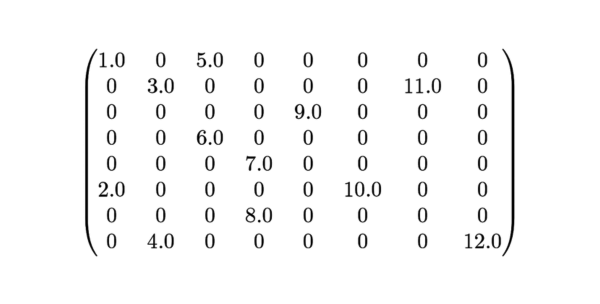

### COO 형식(Coordinate Format)

- 0이 아닌 데이터만 별도의 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열에 저장하는 방식

dense = np.array([3,0,1], [0,2,0])

In [ ]:
from scipy import sparse
import numpy as np

# 0 이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

print(type(sparse_coo))
print(sparse_coo)
dense01=sparse_coo.toarray()
print(type(dense01),"\n", dense01)

<class 'scipy.sparse.coo.coo_matrix'>
  (0, 0)	3
  (0, 2)	1
  (1, 1)	2
<class 'numpy.ndarray'> 
 [[3 0 1]
 [0 2 0]]


sparse_coo는 COO 형식의 희소 행렬 객체 변수입니다. sparse_coo.toarray()를 해주면 원본 행렬이 추출됨을 알 수 있습니다.

-  출처 : 시래블로그(https://radish-greens.tistory.com/1)

 - 파이썬의 scipy에서 행렬의 희소 표현을 지원함. 아래와 같은 행렬이 있다고 하겠다.

<center>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcD8Q4D%2FbtqBL724grQ%2FQsyk3ieSi83bSmhdZDUPt0%2Fimg.png'>
</center>

위 행렬은 5개 원소 빼고는 모두 값이 0인 행렬입니다. 여기서 0이 아닌 원소에만 주목해서 보면, 각각의 원소를 3개의 리스트로 간단히 표현할 수 있습니다. 즉 각 원소의 행 인덱스를 담은 리스트, 각 원소의 열 인덱스를 담은 리스트, 그리고 원소의 값을 담은 리스트로 행렬을 온전히 표현할 수 있습니다.

In [ ]:
from scipy.sparse import coo_matrix

row = [0, 0, 0, 1, 2] # 행 인덱스를 담은 리스트
col = [0, 1, 2, 2, 3] # 열 인덱스를 담은 리스트
data = [2, 4, 2, 1, 5] # 원소 값을 담은 리스트

m = coo_matrix((data, (row, col)))
m

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in COOrdinate format>

보시다시피 0이 아닌 원소 값 5개의 행 인덱스를 row에, 열 인덱스는 col에 담았습니다. 이를 scipy.sparse.coo_matrix에 넘겨주면 희소행렬이 만들어집니다. 원소 값이 0인 부분을 무시하고 나머지의 좌표와 값만 저장하는 것입니다.

<center>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FO7TMj%2FbtqBHy85VeB%2FQeiOhyZKGiF7RWoXkxynmK%2Fimg.png'>
</center>

위와 같이 희소행렬을 표현하는 방식을 coordinate format이라고 합니다. 각 원소의 좌표(coordinate)를 data와 함께 넘겨주었기 때문입니다.

 
참고로 m.row, m.col, m.data를 통해 0 아닌 원소의 좌표와 값에 접근할 수 있습니다.

In [ ]:
m.data

array([2, 4, 2, 1, 5])

## CSR matrix
 - coo 방식에서 행 인덱스를 나타내는 리스트는 [0, 0, 0, 1, 2]이었습니다. 이는 행렬의 첫 번째 행에 0이 아닌 원소가 3개 있다는 의미입니다. 첫 번째 행에 원소가 3개 있다는 것을 알기 위해 굳이 0을 세 번 반복할 필요는 없습니다.

CSR(Compressed Sparse Row) 방식에서는 이러한 반복까지 줄여줍니다. 아래 코드를 보고 이어서 설명하겠습니다.

In [ ]:
from scipy.sparse import csr_matrix

indices = [0, 1, 2, 2, 3]
indptr = [0, 3, 4, 5]
data = [2, 4, 2, 1, 5]
m = csr_matrix((data, indices, indptr))
m

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

위 코드에서 indices는 열 인덱스로서, coo 방식의 col과 같습니다. coo 방식과 다른 부분은 indptr입니다. indptr의 값은 [0, 3, 4, 5]입니다. 이를 보면 'data[0:3]가 첫 번째 행의 원소들이고, data[3:4]가 두 번째 행, data[4:5]가 세 번째 행의 원소 값이구나'라는 걸 알 수 있습니다.

 

이 같은 방식으로 indptr은 data의 구간을 나누어서 어디부터 어디까지가 몇 번째 행인지를 알려줍니다. 이 방식대로라면 indptr은 행 개수+1의 길이를 가지게 됩니다.

<center>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FyXEJq%2FbtqBIIpSSZW%2FJeorqC0cxCS4qP0KfLDZV1%2Fimg.png'>

보시면 indptr은 coo 방식의 row보다 길이가 1 짧습니다. 0이 아닌 값이 반복적으로 등장하는 행(row)이 있을 때, coo 방식은 csr보다 효율이 떨어집니다.

 

csr은 coo 방식에서 나아가 행을 압축했지만, 열을 압축하는 방식인 csc 방식도 있고 방법은 같습니다. 

### CSR 형식(Compressed sparse row)

- COO 형식은 행과 열의 위치를 나타내기 위해서 반복적으로 위치 데이터를 사용해야 합니다. 무슨 말인지 예를 들어 설명해보겠습니다. 아래와 같은 행렬이 있다고 가정해보겠습니다.

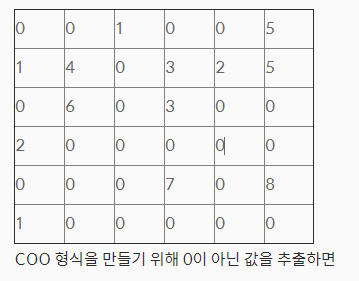



0이 아닌 값의 행과 열의 위치를 나타내는 배열을 구해보면,

행 위치 배열 = [0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5],

열 위치 배열 = [2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0]입니다.

행 위치 배열인 [0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5]을 보면 순차적으로 같은 값이 반복적으로 나타남을 볼 수 있습니다. 0이 2번, 1이 5번, 2가 2번, 4가 2번 반복됩니다. 행 위치 배열이 0부터 순차적으로 증가한다는 특성을 고려해 행 위치 배열의 고유한 값의 시작 위치만 표기하는 방법으로 이런 반복을 제거할 수 있습니다. 0의 시작 인덱스는 0이고, 1의 시작 인덱스는 2이며, 2의 시작 인덱스는 7입니다. 

따라서 행 위치 배열인 [0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5]을 행 위치 배열 내 고유한 값의 시작 위치 배열인 [0, 2, 7, 9, 10, 12]로 변환하면 반복도 줄이고 메모리도 적게 사용할 수 있습니다. 마지막에는 총항목의 개수를 추가해주면 됩니다. 총항목이 13개이므로 최종 배열은 [0, 2, 7, 9, 10, 12, 13]입니다.

이렇듯 COO 형식의 문제점을 보완하기 위한 방식이 CSR(Compressed Sparse Row) 형식입니다. COO 형식에 비해 메모리가 적게 들고 빠른 연산이 가능하여, 일반적으로 COO 형식보다는 CSR 형식을 많이 씁니다.

예제를 통해 COO 형식과 CSR 형식을 비교해보겠습니다.

In [ ]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [ ]:
from numpy import array
from scipy import sparse
dense = array([[1, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 1], [0, 0, 0, 2, 0, 0]])

coo = sparse.coo_matrix(dense)
print(coo)

  (0, 0)	1
  (0, 3)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2


In [ ]:
csr = sparse.csr_matrix(dense)
print(csr)

  (0, 0)	1
  (0, 3)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2


사이킷런의 CountVectorizer, TfidfVectorizer 클래스로 피처 벡터화된 행렬은 모두 CSR 형식입니다.

- 문서 단어 행렬을 만들어보자 (참고 : https://pbj0812.tistory.com/372)
 - *args를 이용하여 여러개의 데이터를 인풋으로 받을 수 있게 설계해보자.

In [ ]:
import pandas as pd
def doc(*args):
    doc_list = []
    df = pd.DataFrame()
    for i in args:
        # 단어 분해
        tmp_list = i.split(' ')
        # 리스트 결합
        doc_list += tmp_list
    doc_list = list(set(doc_list))
    for i in doc_list:
        tmp = []
        for j in args:
            # 단어 분해
            tmp_list = j.split(' ')
            # 단어 세기
            tmp.append(tmp_list.count(i))
        # 데이터 프레임 추가
        df[i] = tmp
    return df

In [ ]:
doc1  = 'I am a boy'
doc2 = 'I am a girl'
doc3 = 'I am a a a man'

In [ ]:
result = doc(doc1, doc2, doc3)
result

,a,I,man,am,boy,girl
0,1,1,0,1,1,0
1,1,1,0,1,0,1
2,3,1,1,1,0,0


### dok

- dok(Dictionary of Keys)방식을 소개하겠습니다. dok는 좌표가 key이고 원소 값이 value인 딕셔너리 구조입니다. dok 방식은 희소행렬을 점진적으로 구축할 때 사용하기 좋습니다.

In [ ]:
from scipy.sparse import dok_matrix

m = dok_matrix((3, 4)) # 값이 0으로 채워진 (3, 4) 크기의 행렬을 만듭니다.
m[0, 1] = 4
m[2, 3] = 9
m.toarray()

array([[0., 4., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 9.]])

- DTM 실습
 - 우리가 다룰 데이터는 아마존에서 휴대폰(cell phone)에 대한 고객 리뷰이다. 리뷰 데이터는 csv형식으로 되어있음. CSV형식은 단순 텍스트 파일로 열과 열 사이를 콤마로 구분하는 것이다.

In [ ]:
from urllib.request import urlretrieve
urlretrieve('http://doc.mindscale.kr/km/unstructured/review.gz','review.gz')

('review.gz', <http.client.HTTPMessage at 0x7f9a588bec10>)

In [ ]:
import pandas as pd
df = pd.read_csv('review.gz')
df.head()

,reviewText,overall
0,They look good and stick good! I just don't li...,4
1,These stickers work like the review says they ...,5
2,These are awesome and make my phone look so st...,5
3,Item arrived in great time and was in perfect ...,4
4,"awesome! stays on, and looks great. can be use...",5


- reviewText열은 고객들의 리뷰이고, overall열은 별점.
- 해당 텍스트를 .loc을 이용해서 봐보자

In [ ]:
df.loc[0,'reviewText'] #0행의 reviewText 열

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

In [ ]:
df['reviewText']

0         They look good and stick good! I just don't li...
1         These stickers work like the review says they ...
2         These are awesome and make my phone look so st...
3         Item arrived in great time and was in perfect ...
4         awesome! stays on, and looks great. can be use...
                                ...                        
194434    Works great just like my original one. I reall...
194435    Great product. Great packaging. High quality a...
194436    This is a great cable, just as good as the mor...
194437    I really like it becasue it works well with my...
194438    product as described, I have wasted a lot of m...
Name: reviewText, Length: 194439, dtype: object

In [ ]:
df['reviewText'].isna().sum()

99

- 일부 데이터는 리뷰가 없음. 없는 행을 한 번 봐보자.

In [ ]:
df.loc[548,'reviewText']

nan

- nan은 문자열이 아니기 때문에 후속 처리에 문제가 생길 가능성이 높다. nan을 빈문자열 ''로 바꾸거나, 해당 리뷰의 데이터를 삭제하는 방법이 있음(list-wise delection). 여기서는 휴자의 방법을 사용하자.

In [ ]:
df.shape

(194439, 2)

In [ ]:
#dropna 메소드를 이용해 nan이 포함된 행을 모두 삭제한다.
df = df.dropna()

In [ ]:
df.shape

(194340, 2)

In [ ]:
df.isnull().sum()

reviewText    0
overall       0
dtype: int64

- 99개 행이 삭제된 것을 알 수 있음.

 - DTM 만들기
  - sklearn-learng의 CountVectorizr을 불러옴. 
  - 여러가지 옵션을 설정할 수 있는데, 여기서는 max_feature를 1000으로 설정한다. 이 옵셥은 DTM에서 포함시킬 최대(Max)의 단어(feature)수를 말한다. 즉, 빈도 순으로 최대 1000단어까지만 포함시킨다. stop_words는 분석에서 제외할 불용어를 설정하는 옵션이다. english로 설정하면 영어의 관사, 전치사 등을 자동으로 제외시킴. 한국어는 지원하지 않기 때문에 한국어를 분석할 때는 다른 방법이 필요함.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000, stop_words = 'english')

In [ ]:
#cv를 이용해서 DTM으로 변환
tdm = cv.fit_transform(df['reviewText'])

- fit_transform 은 fit 과 transform 두 개의 메소드를 합친 것이다. fit은 단어 문서 행렬의형태를 정하는 메소드로, 각 열에 들어갈 단어를 결정한다. 이 정보는 cv 의 내부에 저장된다.
- transform 은 이렇게 정해진 형태로 데이터를 변환하는 메소드이다. 실제 단어 문서 행렬은transform 에 의해 만들어진다. 다른 데이터를 리뷰 데이터와 같은 형태로 변환하고 싶다면,
fit_transform 이 아닌 transform 을 사용한다.

- 결과적으로 변환된 단어 문서 행렬은 변수 tdm 에 할당된다. tdm 변수의 형태를 확인해보자.

In [ ]:
tdm.shape

(194340, 1000)

- 행의 수는 문서의 수이기 때문에 df 와 같다. 열의 수는 단어의 수이기 때문에 처음 설정한대로1000개이다. 앞에서 설명한 대로 단어 문서 행렬의 형태는 cv 내부에 저장되기 때문에 단어 목록을 보려면 cv 의 get_feature_names 메소드를 사용한다.

In [ ]:
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10',
 '100',
 '12',
 '15',
 '1a',
 '20',
 '25',
 '30',
 '34',
 '3g',
 '40',
 '4g',
 '4s',
 '50',
 '5s',
 '8217',
 'ability',
 'able',
 'absolutely',
 'ac',
 'access',
 'accessories',
 'actual',
 'actually',
 'adapter',
 'adapters',
 'add',
 'added',
 'addition',
 'additional',
 'adds',
 'adjust',
 'advertised',
 'ago',
 'air',
 'allow',
 'allows',
 'amazing',
 'amazon',
 'amp',
 'amps',
 'android',
 'angle',
 'anker',
 'annoying',
 'answer',
 'anti',
 'anymore',
 'apart',
 'app',
 'appears',
 'apple',
 'application',
 'apply',
 'apps',
 'area',
 'aren',
 'arm',
 'armor',
 'arrived',
 'ask',
 'attach',
 'attached',
 'attractive',
 'audio',
 'automatically',
 'available',
 'average',
 'away',
 'awesome',
 'background',
 'backup',
 'bad',
 'bag',
 'band',
 'bank',
 'barely',
 'base',
 'based',
 'basic',
 'basically',
 'bass',
 'batteries',
 'battery',
 'beat',
 'beautiful',
 'believe',
 'belkin',
 'belt',
 'best',
 'better',
 'big',
 'bigger',
 'biggest',
 'bit',
 'black',
 'blackberry'

- 다른 방법을 지정해주지 않으면 CountVectorizer 는 숫자든 문자든 가리지 않고 공백만으로 단어를 구별한다. 숫자를 제거해주는 것도 가능하지만 자주 나오는 숫자들은 모델명 등 특별히 의미가있는 숫자인 경우도 있기 때문에 잘 생각해보고 결정해야 한다.
- 이 단어 목록은 앞으로 자주 쓰게 되므로 words 라는 변수에 따로 할당을 해두도록 하자.

In [ ]:
words = cv.get_feature_names()

- tdm에서 첫 문서의 정보를 보면 Compressed Sparse Row format라는 표현이 나온다. 단어 문서 행렬을 대부분의 값이 0이다. sparse라는 단어는 '희박한'이라는 뜻으로 이렇게 대부분이 0인행렬을 가리킨다. 이런 희박 행렬을 다룰 때는 메모리를 절약하기 위해 압축된(Compressed) 형식을 사용한다. 그래서 내용을 바로 확인할 수는 없다

In [ ]:
tdm[0]

<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

- 내용을 확인하려면 압축을 풀어주어야 한다. 이렇게 보면 대부분의 값이 0인 것을 볼 수 있다

In [ ]:
doc = tdm[0].toarray()
doc

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

- 이제 문서 doc 에서 출현한 단어들을 확인해보자. 여기서 list comprehension이라는 문법을 사용하겠다. 당장은 이 표현을 잘 이해하지 못하더라도 괜찮다. 아래 코드는 주석에 붙인 번호 순서대로 읽으면 된다.

In [ ]:
[w # (4) 단어들의 리스트
    for w, c # (2) 각 단어와 빈도 중에
    in zip(words, doc.flat) # (1) 단어들과 빈도를 짝지운다.
    if c > 0] # (3) 빈도가 0보다 큰

['buy',
 'don',
 'good',
 'just',
 'kept',
 'like',
 'look',
 'product',
 'shape',
 'stick',
 'won']

- 단어 빈도
 - 이제 전체 코퍼스에서 단어 빈도를 구해보자. 이때는 합계를 구하는 sum 메소드를 사용한다. sum 메소드에는 axis 라는 옵션을 설정할 수 있다. axis=0 이면 열별로 모든 행의 합계를 구한다. axis=1 이면 행별로 모든 열들의 합계를 구한다. 옵션을 지정하지 않으면 모든 값의 합계를 구한다.


In [ ]:
count = tdm.sum(axis=0)

- 이제 단어와 단어 빈도를 짝지어 리스트로 만들자. count 가 행렬 형태이기 때문에 .flat을 이용해 평평한 형태로 바꿔준다. 그리고 zip 을 이용해 단어와 빈도를 하나씩 짝을 짓고, 마지막으로list 를 이용해서 리스트로 변환한다.

In [ ]:
word_count = list(zip(words, count.flat))

- 내용을 확인해보면,

In [ ]:
word_count

[('10', 7810),
 ('100', 4240),
 ('12', 2490),
 ('15', 2309),
 ('1a', 3029),
 ('20', 3685),
 ('25', 1773),
 ('30', 4659),
 ('34', 16953),
 ('3g', 2332),
 ('40', 1453),
 ('4g', 3884),
 ('4s', 5421),
 ('50', 2622),
 ('5s', 3639),
 ('8217', 4338),
 ('ability', 1922),
 ('able', 11460),
 ('absolutely', 3543),
 ('ac', 2722),
 ('access', 3859),
 ('accessories', 1624),
 ('actual', 2084),
 ('actually', 10653),
 ('adapter', 6805),
 ('adapters', 1664),
 ('add', 5374),
 ('added', 2973),
 ('addition', 1851),
 ('additional', 2032),
 ('adds', 2949),
 ('adjust', 1711),
 ('advertised', 2686),
 ('ago', 2762),
 ('air', 3562),
 ('allow', 2822),
 ('allows', 4156),
 ('amazing', 4316),
 ('amazon', 10296),
 ('amp', 2272),
 ('amps', 1494),
 ('android', 8018),
 ('angle', 1654),
 ('anker', 3457),
 ('annoying', 2886),
 ('answer', 2404),
 ('anti', 1746),
 ('anymore', 1484),
 ('apart', 2755),
 ('app', 5158),
 ('appears', 1937),
 ('apple', 10633),
 ('application', 2406),
 ('apply', 3618),
 ('apps', 4861),
 ('area', 3

- 빈도순 정렬
 - 먼저 operator 모듈을 임포트한다.

In [ ]:
import operator
# 정렬해보면, 
word_order = sorted(
    word_count,
    key = operator.itemgetter(1), #0이면 단어순, 1이면 빈도순
    reverse = True                # 내림차순(역순)으로 정렬한다.
)

- 가장 많이 사용된 10개 단어를 확인한다.

In [ ]:
word_order[:10]

[('phone', 181717),
 ('case', 150035),
 ('like', 74073),
 ('great', 68898),
 ('use', 63229),
 ('screen', 62373),
 ('just', 61980),
 ('good', 60355),
 ('battery', 59361),
 ('iphone', 49758)]

- wordcloud
 - 먼저 윈도에서는 Unofficial Windows Binaries for Python Extension Packages에서wordcloud-1.3.3-cpXX-cpXXm-win_amdXX.whl를 자신의 Python 버전과 운영체제 bit에맞게 다운로드한 후, 다운로드 폴더에서 명령창을 열어 아래 명령을 입력한다.



```
pip install wordcloud-1.3.3-cpXX-cpXXm-win_amdXX.whl
```



In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


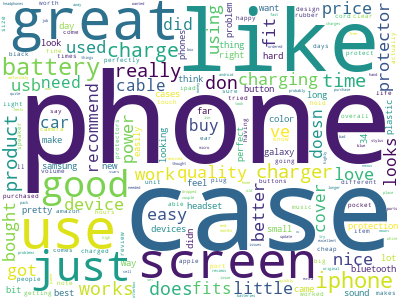

In [ ]:
from wordcloud import WordCloud
%matplotlib inline
#배경색 흰색, 가로 400픽셀, 세로 300픽셀의 그림을 설정.
wc = WordCloud(background_color='white', width=400, height=300)
#word_count를 위의 설정의 그림으로 변환하여 cloud 변수에 할당한다.
cloud = wc.fit_words(dict(word_count))
#dict으로 처리한 이유 : https://stackoverflow.com/questions/38465478/wordcloud-from-data-frame-with-frequency-python
#cloud 변수의 그림을 노트북에 붙여 넣으려면 아래와 같이 함.
cloud.to_image()

# TF-IDF(Term Frequency-Inverse Document Frequency)

- 카운트만 부여할 경우 그 문서의 특징을 나타내기보다는 언어의 특성상 문장에서 자주 사용될 수밖에 없는 단어까지 높은 값을 부여하게 됨. 이러한 문제를 보완하기 위해 TF-IDF 벡터화를 사용
- TF-IDF는 **개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식으로 값을 부여**


- TF-IDF(Term Frequency-Inverse Document Frequency)는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의** 각 단어들마다 중요한 정도를 가중치로 주는 방법**입니다. 사용 방법은 우선 DTM을 만든 후, TF-IDF 가중치를 부여합니다.

- TF-IDF는 **주로 문서의 유사도를 구하는 작업**, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰일 수 있음.

- 특정 단어가 다른 문서에는 나타나지 않고 특정 문서에서만 자주 사용된다면 해당 단어는 해당 문서를 잘 특징짓는 중요 단어일 가능성이 높음

0 특정 단어가 매우 많은 여러 문서에서 빈번히 나타난다면 해당 단어는 개별 문서를 특징짓는 정보로서의 의미를 상실.

- TF-IDF는 TF와 IDF를 곱한 값을 의미하는데 이를 식으로 표현해보겠습니다. 문서를 d, 단어를 t, 문서의 총 개수를 n이라고 표현할 때 TF, DF, IDF는 각각 다음과 같이 정의할 수 있습니다.

### 1. tf(d,t) : 특정 문서 d에서의 특징 단어 t의 등장 횟수
- TF는 앞에서 배운 DTM의 예제에서 각 단어들이 가진 값들입니다. DTM이 각 문서에서의 각 단어의 등장 빈도를 나타내는 값이었기 때문.

- 문서에서 해당 단어가 얼마나 나왔는지를 나타내는 지표


### 2. df(t) : 특정 단어 t가 등장한 문서의 수
- 여기서 특정 단어가 각 문서, 또는 문서들에서 몇 번 등장했는지는 관심가지지 않으며 오직 특정 단어 t가 등장한 문서의 수에만 관심을 가집니다.
- 해당 단어가 몇 개의 문서에서 나타났는지를 나타내는 지표

### 3. idf(d,t) : df(t)에 반비례하는 수
- df의 역수로서 (${\dfrac {전체 문서수}{DF}})$

- TF-IDF  = $TF_i{\times}{log{{\dfrac{N}{DF_i}}}}$, $TF_i$ = 개별 문서에서의 단어 $i$빈도, $DF_i$ = 단어 $i$를 가지고 있는 문서 개수, $N$ = 전체 문서 개수


$idf(d,t) = {\log} ({\dfrac{n}{1+df(t)}})$


- IDF라는 이름을 보고 DF의 역수가 아닐까 생각했다면, IDF는 DF의 역수를 취하고 싶은 것이 맞습니다. 그런데 log와 분모에 1을 더해주는 식에 의아하실 수 있습니다. log를 사용하지 않았을 때, IDF를 DF의 역수(${\dfrac{n}{df(t)}}$라는 식)로 사용한다면 총 문서의 수 n이 커질 수록, IDF의 값은 기하급수적으로 커지게 됩니다. 그렇기 때문에 log를 사용합니다.

왜 log가 필요한지 n=1,000,000일 때의 예를 들어봅시다. log의 밑은 10을 사용한다고 가정하였을 때 결과는 아래와 같습니다.

$idf(d,t)=log(n/df(t)), n=1,000,000$

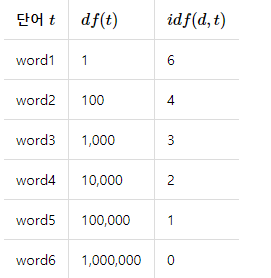

log를 사용하지 않으면 idf의 값이 어떻게 커지는지 보겠습니다.

$idf(d,t) = n/df(t) , n=1,000,000

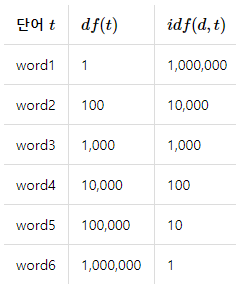

- 또 다른 직관적인 설명은 불용어 등과 같이 자주 쓰이는 단어들은 비교적 자주 쓰이지 않는 단어들보다 최소 수십 배 자주 등장합니다. 그런데 비교적 자주 쓰이지 않는 단어들조차 희귀 단어들과 비교하면 또 최소 수백 배는 더 자주 등장하는 편입니다. 이 때문에 log를 씌워주지 않으면, 희귀 단어들에 엄청난 가중치가 부여될 수 있습니다. 로그를 씌우면 이런 격차를 줄이는 효과가 있습니다.

- 또한 log 안의 식에서 분모에 1을 더해주는 이유는 첫번째 이유로는 특정 단어가 전체 문서에서 등장하지 않을 경우에 분모가 0이 되는 상황을 방지하기 위함입니다.

- TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단합니다. TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것입니다. 즉, the나 a와 같이 불용어의 경우에는 모든 문서에 자주 등장하기 마련이기 때문에 자연스럽게 불용어의 TF-IDF의 값은 다른 단어의 TF-IDF에 비해서 낮아지게 됩니다.

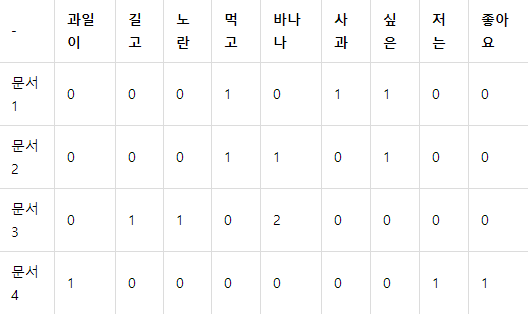

- 앞서 DTM을 설명하기위해 들었던 위의 예제를 가지고 TF-IDF에 대해 이해해보도록 하겠습니다. 우선 TF는 앞서 사용한 DTM을 그대로 사용하면, 그것이 각 문서에서의 각 단어의 TF가 됩니다.

- 그렇다면 이제 구해야할 것은 TF와 곱해야할 값인 IDF입니다. 로그는 자연 로그를 사용하도록 하겠습니다. 자연 로그는 로그의 밑을 자연 상수 e(e=2.718281...)를 사용하는 로그를 말합니다. IDF 계산을 위해 사용하는 로그의 밑은 TF-IDF를 사용하는 사용자가 임의로 정할 수 있는데, 여기서 로그는 마치 기존의 값에 곱하여 값의 크기를 조절하는 상수의 역할을 합니다. 그런데 보통 각종 프로그래밍 언어나 프로그램에서 패키지로 지원하는 TF-IDF의 로그는 대부분 자연 로그를 사용합니다. 그렇기 때문에 저 또한 자연 로그를 사용하도록 하겠습니다. 자연 로그는 보통 log라고 표현하지 않고, ln이라고 표현합니다.

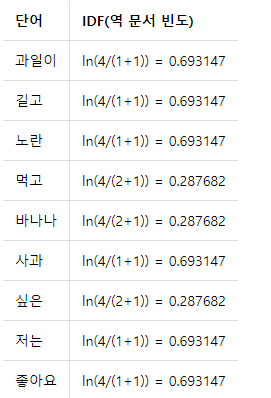

- 문서의 총 수는 4이기 때문에 ln 안에서 분자는 늘 4으로 동일합니다. 분모의 경우에는 각 단어가 등장한 문서의 수(DF)를 의미하는데, 예를 들어서 '먹고'의 경우에는 총 2개의 문서(문서1, 문서2)에 등장했기 때문에 2라는 값을 가집니다. 각 단어에 대해서 IDF의 값을 비교해보면 문서 1개에만 등장한 단어와 문서2개에만 등장한 단어는 값의 차이를 보입니다. IDF는 여러 문서에서 등장한 단어의 가중치를 낮추는 역할을 하기 때문입니다.

- 그러면 이제 TF-IDF를 계산해보도록 하겠습니다. TF는 DTM을 그대로 가져오면 각 문서에서의 각 단어의 TF를 가져오게 되기 때문에, 앞서 사용한 DTM에서 단어 별로 위의 IDF값을 그대로 곱해주면 TF-IDF가 나오게 됩니다.

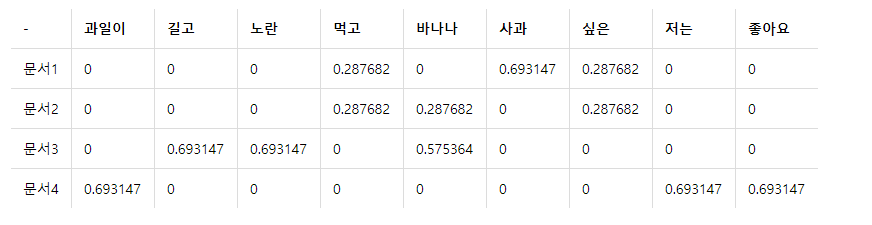

사실 예제 문서가 굉장히 간단하기 때문에 계산은 매우 쉽습니다. 문서3에서의 바나나만 TF 값이 2이므로 IDF에 2를 곱해주고, 나머진 TF 값이 1이므로 그대로 IDF 값을 가져오면 됩니다. 문서2에서의 바나나의 TF-IDF 가중치와 문서3에서의 바나나의 TF-IDF 가중치가 다른 것을 볼 수 있습니다. 수식적으로 말하면, TF가 각각 1과 2로 달랐기 때문인데 TF-IDF에서의 관점에서 보자면 TF-IDF는 특정 문서에서 자주 등장하는 단어는 그 문서 내에서 중요한 단어로 판단하기 때문입니다. 문서2에서는 바나나를 한 번 언급했지만, 문서3에서는 바나나를 두 번 언급했기 때문에 문서3에서의 바나나를 더욱 중요한 단어라고 판단하는 것입니다.

파이썬으로 TF-IDF 직접 구현하기



In [ ]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

In [ ]:
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
vocab

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [ ]:
#TF,IDF 그리고 TF-IDF 값을 구하는 함수
N = len(docs) # 총 문서의 수

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [ ]:
#TF를 구해보자. ->DTM을 데이터프레임에 저장하여 출력

result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [ ]:
#정상적인 DTM이 출력되어짐. 이제 각 단어에 대한 IDF 값을 구해보자

result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [ ]:
#TF-IDF 행렬을 출력

result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


지금까지 TF-IDF의 가장 기본적인 식에 대해서 학습하고, 이를 실제로 구현하는 실습을 진행해보았습니다. 그런데 사실 실제 TF-IDF 구현을 제공하고 있는 많은 패키지들은 패키지마다 식이 조금씩 다르긴 하지만, 위에서 배운 기본 식에서 조정된 식을 사용합니다. 그 이유는 위의 기본적인 식을 바탕으로 한 구현에도 여전히 문제점이 존재하기 때문입니다. 만약 전체 문서의 수 n이 4인데, df(t)의 값이 3인 경우에는 어떤 일이 벌어질까요? df(t)에 1이 더해지면서 log항의 분자와 분모의 값이 같아지게 됩니다.

이는 log의 진수값이 1이 되면서 idf(d,t)의 값이 0이 됨을 의미합니다. 식으로 표현하면 idf(d,t)=log(n/(df(t)+1))=0입니다. IDF의 값이 0이라면 더 이상 가중치의 역할을 수행하지 못합니다. 그래서 실제 구현체는 idf(d,t)=log(n/(df(t)+1))+1과 같이 log항에 1을 더해줘서 log항의 값이 0이 되더라도 IDF가 최소 1이상의 값을 가지도록 합니다. 사이킷런도 이 방식을 사용합니다.

사이킷런을 이용한 DTM과 TF-IDF 실습

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

DTM이 완성되었습니다. DTM에서 각 단어의 인덱스가 어떻게 부여되었는지를 확인하기 위해, 인덱스를 확인해보았습니다. 첫번째 열의 경우에는 0의 인덱스를 가진 do입니다. do는 세번째 문서에만 등장했기 때문에, 세번째 행에서만 1의 값을 가집니다. 두번째 열의 경우에는 1의 인덱스를 가진 know입니다. know는 첫번째 문서에만 등장했기 때문에 첫번째 행에서만 1의 값을 가집니다.

사이킷런은 TF-IDF를 자동 계산해주는 TfidfVectorizer를 제공합니다. 향후 실습을 하다가 혼란이 생기지 않도록 언급하자면, 사이킷런의 TF-IDF는 위에서 배웠던 보편적인 TF-IDF 식에서 좀 더 조정된 다른 식을 사용합니다. 하지만 크게 다른 식은 아니며(IDF의 로그항의 분자에 1을 더해주며, 로그항에 1을 더해주고, TF-IDF에 L2 정규화라는 방법으로 값을 조정하는 등의 차이), 여전히 TF-IDF가 가진 의도를 그대로 갖고 있으므로 사이킷런의 TF-IDF를 그대로 사용하셔도 좋습니다.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

- 함수를 이용하여 TF-IDF 구현

In [ ]:
import pandas as pd
from math import log

In [ ]:
doc1  = 'I am a boy'
doc2 = 'I am a girl'
doc3 = 'I am a a a man'

In [ ]:
def doc(*args):
    doc_list = []
    tf = pd.DataFrame()
    idf = pd.DataFrame()
    tf_idf = pd.DataFrame()
    
    # 단어 리스트 생성
    for i in args:
        # 단어 분해
        tmp_list = i.split(' ')
        # 리스트 결합
        doc_list += tmp_list
    doc_list = list(set(doc_list))
    
    # DF
    df = []
    for i in doc_list:
        tmp = 0
        for j in args:
            # 단어 분해
            tmp_list = list(set(j.split(' ')))
            if i in tmp_list:
                tmp += 1
        df.append(tmp)
        
    # TF(DTM), IDF, TF-IDF
    for i in range(len(doc_list)):
        tmp = []
        tmp2 = []
        tmp3 = []
        for j in args:
            # 단어 분해
            tmp_list = j.split(' ')
            # 단어 세기
            tmp.append(tmp_list.count(doc_list[i]))
            tmp2.append(log(len(args) / (df[i] + 1)))
            tmp3.append((tmp_list.count(doc_list[i])) * (log(len(args) / (df[i] + 1))))
        # 데이터 프레임 추가
        tf[doc_list[i]] = tmp
        idf[doc_list[i]] = tmp2
        tf_idf[doc_list[i]] = tmp3
    return tf, df, idf, tf_idf

In [ ]:
tf, df, idf, tf_idf = doc(doc1, doc2, doc3)

In [ ]:
tf

,a,I,man,am,boy,girl
0,1,1,0,1,1,0
1,1,1,0,1,0,1
2,3,1,1,1,0,0


In [ ]:
df

[3, 3, 1, 3, 1, 1]

In [ ]:
idf

,a,I,man,am,boy,girl
0,-0.287682,-0.287682,0.405465,-0.287682,0.405465,0.405465
1,-0.287682,-0.287682,0.405465,-0.287682,0.405465,0.405465
2,-0.287682,-0.287682,0.405465,-0.287682,0.405465,0.405465


In [ ]:
tf-idf

,a,I,man,am,boy,girl
0,1.287682,1.287682,-0.405465,1.287682,0.594535,-0.405465
1,1.287682,1.287682,-0.405465,1.287682,-0.405465,0.594535
2,3.287682,1.287682,0.594535,1.287682,-0.405465,-0.405465


#  실습 : 20 Newsgroup 분류하기

188846개의 뉴스 20개의 뉴스 카테고리로 분류하기.

1. 텍스트 정규화
2. 피처 벡터화
3. 머신러닝 학습/예측/평가
4. Pipeline 적용
5. GridSearch 최적화

In [ ]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset = 'all', random_state = 42)

In [ ]:
print(news_data.keys())

In [ ]:
import pandas as pd

print('target 클래스의 값과 분포도 \n',pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n',news_data.target_names)

In [ ]:
print(news_data.data[0])

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용(Train) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target
print(type(X_train))

# subset='test'으로 테스트(Test) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news= fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0} , 테스트 데이터 크기 {1}'.format(len(train_news.data) , len(test_news.data)))

Count 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가

**주의 : 학습 데이터에 대해 fit()된 CountVectorizer 를 이용해서 테스트 데이터를 피처 벡터화 해야함.
테스트 데이터에서 다시 CountVecotrizer의 fit_trainform()을 수행하거나 fit()을 수행 하면 안됨.
이는 이렇게 테스트 데이터에서 fit()을 수행하게 되면 기존 학습된 모델에서 가지는 feature의 갯수가 달라지기 때문.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행. 
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train , y_train) #cnt_ect.fit_transform(X_train,y_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit( )된 CountVectorizer를 이용하여 테스트 데이터를 feature extraction 변환 수행. 
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 Text의 CountVectorizer Shape:',X_train_cnt_vect.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect , y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환. 
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

In [ ]:
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 Feature Vectorization 적용.
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300 )
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

In [ ]:
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행. CV는 3 Fold셋으로 설정. 
params = { 'C':[0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf ,param_grid=params , cv=3 , scoring='accuracy' , verbose=1 )
grid_cv_lr.fit(X_train_tfidf_vect , y_train)
print('Logistic Regression best C parameter :',grid_cv_lr.best_params_ )

# 최적 C 값으로 학습된 grid_cv로 예측 수행하고 정확도 평가. 
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

사이킷런 파이프라인(Pipeline) 사용 및 GridSearchCV와의 결합

In [ ]:
from sklearn.pipeline import Pipeline

# TfidfVectorizer 객체를 tfidf_vect 객체명으로, LogisticRegression객체를 lr_clf 객체명으로 생성하는 Pipeline생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
    ('lr_clf', LogisticRegression(C=10))
])

# 별도의 TfidfVectorizer객체의 fit_transform( )과 LogisticRegression의 fit(), predict( )가 필요 없음. 
# pipeline의 fit( ) 과 predict( ) 만으로 한꺼번에 Feature Vectorization과 ML 학습/예측이 가능. 
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])

# Pipeline에 기술된 각각의 객체 변수에 언더바(_)2개를 연달아 붙여 GridSearchCV에 사용될 
# 파라미터/하이퍼 파라미터 이름과 값을 설정. . 
params = { 'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100, 300, 700],
           'lr_clf__C': [1,5,10]
}

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_pipe.fit(X_train , y_train)
print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))